In [1]:
# connect to the database
import datajoint as dj
dj.config.load('/Users/neurozmar/Secrets/dj_local_conf_NDNF_behavior.json')
dj.conn()



/Users/neurozmar/Scripts/NDNF-behavior/.venv/lib/python3.13/site-packages/datajoint/plugin.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
[2026-01-06 22:19:20,220][INFO]: DataJoint is configured from /Users/neurozmar/Secrets/dj_local_conf_NDNF_behavior.json
[2026-01-06 22:19:20,673][INFO]: DataJoint 0.14.6 connected to rozmar@cs16-datajoint.koki.local:3306


DataJoint connection (connected) rozmar@cs16-datajoint.koki.local:3306

In [2]:
#%% import necessary packages
import matplotlib.pyplot as plt
import pandas as pd
from ndnf_pipeline import lab, experiment
import numpy as np
#

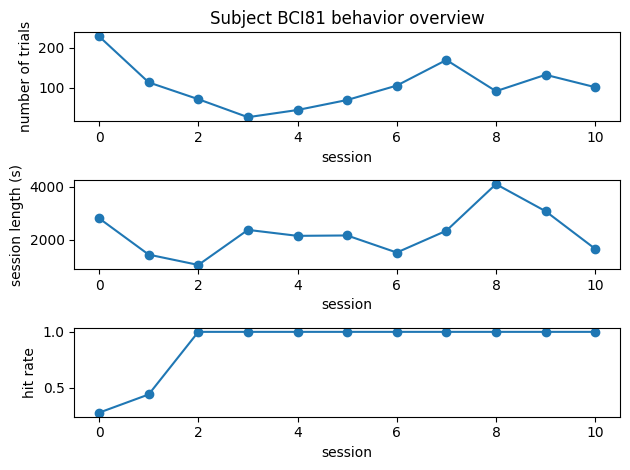

In [6]:

subject_id = 'BCI81'
available_sessions = (experiment.Session()&{'subject_id':subject_id}).fetch('session')
trial_nums = []
hit_rates = []
session_lengths = []
for session in available_sessions:
    trials = (experiment.SessionTrial()&{'subject_id':subject_id,'session':session}).fetch('trial')
    trial_nums.append(len(trials))
    hits = len(experiment.BehaviorTrial()&{'subject_id':subject_id,'session':session,'outcome':'hit'})
    hit_rate = hits/len(trials) if len(trials)>0 else np.nan
    hit_rates.append(hit_rate)
    session_length = (experiment.SessionTrial()&{'subject_id':subject_id,'session':session,'trial':np.max(trials)}).fetch1('trial_end_time')
    session_lengths.append(session_length)
fig = plt.figure()
ax1 = fig.add_subplot(3,1,1)
ax1.plot(available_sessions,trial_nums,'o-')
ax1.set_xlabel('session')
ax1.set_ylabel('number of trials')
plt.title(f'Subject {subject_id} behavior overview')
ax2 = fig.add_subplot(3,1,2)
ax2.plot(available_sessions,session_lengths,'o-')
ax2.set_xlabel('session')
ax2.set_ylabel('session length (s)')
ax3 = fig.add_subplot(3,1,3)
ax3.plot(available_sessions,hit_rates,'o-')
ax3.set_xlabel('session')
ax3.set_ylabel('hit rate')
plt.tight_layout()
plt.show()